<a href="https://colab.research.google.com/github/espressoD/Midterm-UTS-ML/blob/Assesment2/midterm_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gdown

In [2]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=82827fd2-1a32-43e0-8ded-a19d1c00851c
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:08<00:00, 54.5MB/s]


'midterm-regresi-dataset.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = '/content/midterm-regresi-dataset.csv'

# Load Data
# Kita asumsikan file ini punya header. Jika baris pertama langsung angka, tambahkan parameter: header=None
df = pd.read_csv(path)

print("Ukuran Data:", df.shape)
df.head()

Ukuran Data: (515344, 91)


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [4]:
#Cell 2: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Pisahkan Fitur (X) dan Target (y)
# iloc[:, 0] = Ambil semua baris, kolom ke-0 saja (Tahun)
y = df.iloc[:, 0]

# iloc[:, 1:] = Ambil semua baris, mulai kolom ke-1 sampai habis (Fitur Audio)
X = df.iloc[:, 1:]

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling (Standarisasi)
# Penting untuk Regresi agar model lebih cepat konvergen
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data siap dilatih!")

Data siap dilatih!


In [6]:
#Cell 3: Modelling linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Pelatihan linear regression selesai.")

Pelatihan selesai.


In [10]:
#Cell 4: Modelling gradient boosting
!pip install lightgbm

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Siapkan dataset lightgbm
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameter
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,       # Kompleksitas pohon
    'learning_rate': 0.05,  # Kecepatan belajar
    'feature_fraction': 0.9 # Gunakan 90% fitur tiap iterasi (biar cepat)
}

print("Mulai melatih LightGBM...")
# num_boost_round=1000: Maksimal 1000 iterasi
# early_stopping_rounds=50: Kalau 50x tidak ada progress, berhenti
model_lgb = lgb.train(params,
                      train_data,
                      num_boost_round=1000,
                      valid_sets=[test_data],
                      callbacks=[lgb.early_stopping(stopping_rounds=50)])

print("Selesai!")

# Prediksi
y_pred_lgb = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)

# Evaluasi
print(f"MAE: {mean_absolute_error(y_test, y_pred_lgb):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lgb):.4f}")

Mulai melatih LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.518784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22950
[LightGBM] [Info] Number of data points in the train set: 412275, number of used features: 90
[LightGBM] [Info] Start training from score 1998.384103
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 8.78219
Selesai!
MAE: 6.13
R2 Score: 0.3502


In [11]:
#Cell 5: Evaluasi (Metrik Regresi)
def evaluasi_model(nama_model, y_asli, y_prediksi):
    mae = mean_absolute_error(y_asli, y_prediksi)
    rmse = np.sqrt(mean_squared_error(y_asli, y_prediksi))
    r2 = r2_score(y_asli, y_prediksi)

    print(f"--- Evaluasi {nama_model} ---")
    print(f"MAE (Rata-rata Meleset): {mae:.2f} Tahun")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 30)

evaluasi_model("Linear Regression", y_test, y_pred_lr)
evaluasi_model("Random Forest", y_test, y_pred_lgb)

--- Evaluasi Linear Regression ---
MAE (Rata-rata Meleset): 6.78 Tahun
RMSE: 9.52
R2 Score: 0.2360
------------------------------
--- Evaluasi Random Forest ---
MAE (Rata-rata Meleset): 6.13 Tahun
RMSE: 8.78
R2 Score: 0.3502
------------------------------


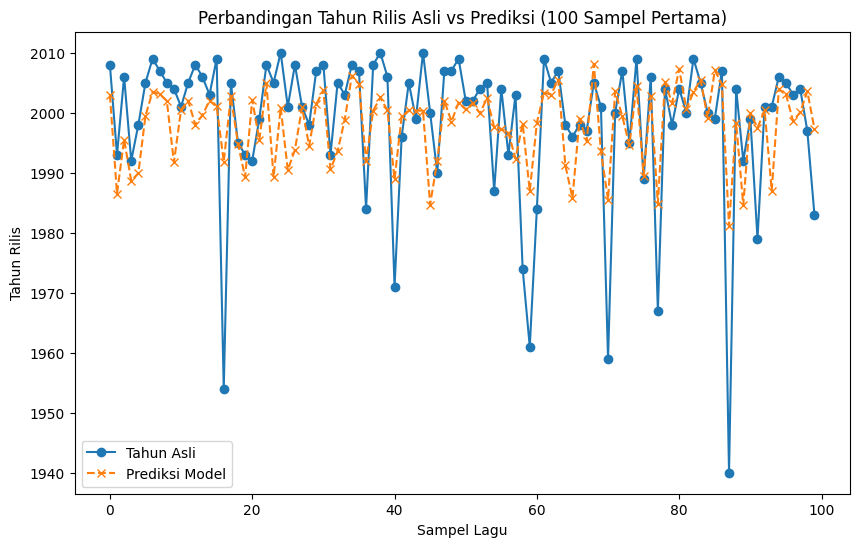

In [12]:
#Cell 6: Visualisasi Hasil
plt.figure(figsize=(10, 6))

# Ambil 100 sampel pertama biar grafik tidak pusing
plt.plot(y_test.values[:100], label='Tahun Asli', marker='o')
plt.plot(y_pred_lgb[:100], label='Prediksi Model', marker='x', linestyle='--')

plt.title('Perbandingan Tahun Rilis Asli vs Prediksi (100 Sampel Pertama)')
plt.ylabel('Tahun Rilis')
plt.xlabel('Sampel Lagu')
plt.legend()
plt.show()